In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/train (3).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Exploratory Data Analysis

In [ ]:
#checking for the missing values

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


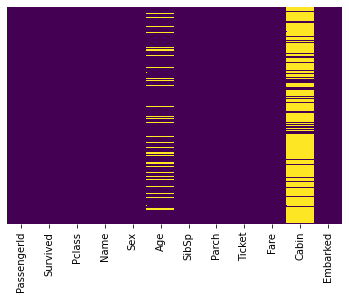

In [7]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis")

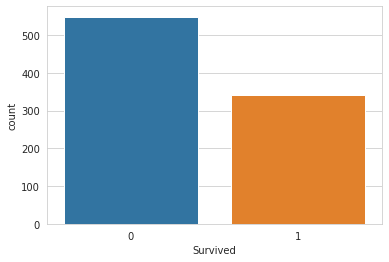

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

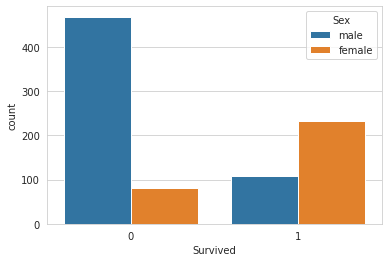

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)

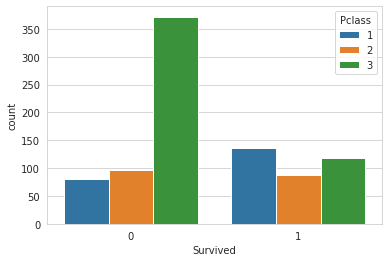

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

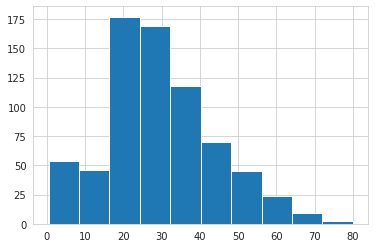

In [14]:
plt.hist(df.Age.dropna())

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

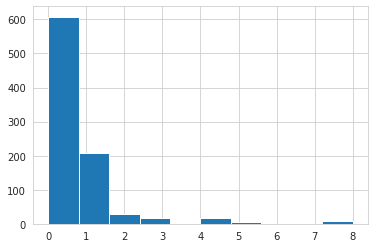

In [15]:
plt.hist(df.SibSp)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

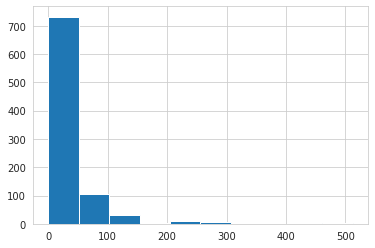

In [21]:
plt.hist(df.Fare)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


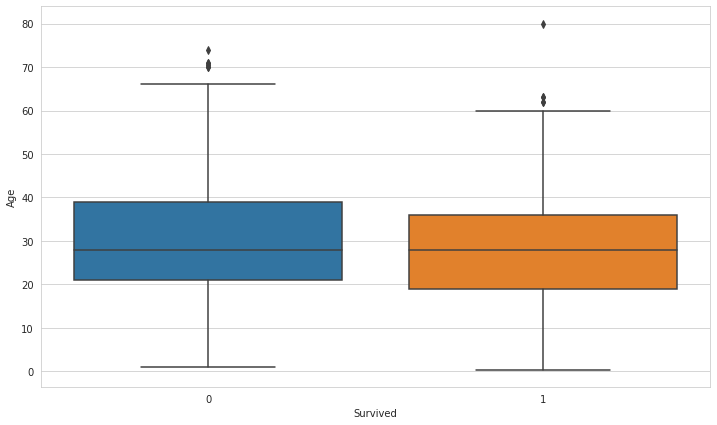

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Survived',y="Age",data=df)

In [24]:
def impute_age(cols):
  Age=cols[0]
  Survived=cols[1]

  if pd.isnull(Age):
    if Survived==0:
      return 28
    else:
      return 27
  else:
    return Age

In [25]:
#now we should apply that function to dataset
df.Age=df[["Age","Survived"]].apply(impute_age,axis=1)

In [30]:
df.drop(["Cabin"],axis="columns",inplace=True)

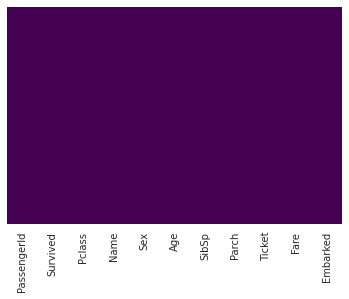

In [31]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#since passengerID,Name,Tickect are not Required
#so we drop that column

In [35]:
remove=["PassengerId","Ticket","Name"]
df.drop(labels=remove,axis="columns",inplace=True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Handling the categorical columns

In [40]:
Sex=pd.get_dummies(df.Sex,drop_first=True)

In [42]:
Embarked=pd.get_dummies(df.Embarked,drop_first=True)

In [44]:
remove=["Sex","Embarked"]
df.drop(labels=remove,axis="columns",inplace=True)

In [46]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#seperate the dependend and indepndent feature

In [50]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [49]:
#model building
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_pred=clf.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)

0.847457627118644

In [ ]:
#since we have low accuracy so we have to do hyperparameter tunning

In [62]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [66]:
rf_params={
    'n_estimators':[1,2,3,4,5,6,7,8,9,10],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'criterion':["entropy","gini"]
}
clf=RandomForestClassifier(random_state=0)
grid=GridSearchCV(clf,rf_params,cv=3,scoring="accuracy")
grid.fit(x_train,y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 9}
Accuracy:0.8322250985567567
